The objective of this project is to train a regression model to categorize an image.
Last supported Tensorflow GPU version can be found here: https://www.tensorflow.org/install/source_windows#gpu
Currently using: Python 3.10.11, CUDNN 8.1, CUDA 11.2 for Windows compatibility

Install python 3.10.11
Create a virtual environment with py -3.10 -m venv .venv
Activate the environment
Install the dependencies: pip install -r requirements.txt
Select the kernel of the virtual environment

In [1]:
#!/usr/bin/env python3.10.11

import tensorflow as tf
keras = tf.keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
# Import training data
def normalize(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

dataset = tf.keras.preprocessing.image_dataset_from_directory('GLA_USA/train', labels="inferred", label_mode="binary")
dataset = dataset.map(normalize)
dataset_test = dataset.take(2)
dataset_train = dataset.skip(0)

Found 41 files belonging to 2 classes.


In [16]:
# Create model
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=10,
                        kernel_size=3,
                        input_shape=(256, 256, 3),
                        activation="relu"
                        ),
    keras.layers.Conv2D(filters=10,
                        kernel_size=3,
                        activation="relu"
                        ),
    keras.layers.MaxPool2D(pool_size=2,
                           padding="valid"),
    keras.layers.Conv2D(filters=10,
                        kernel_size=3,
                        activation="relu"
                        ),
    keras.layers.Conv2D(filters=10,
                        kernel_size=3,
                        activation="relu"
                        ),
    keras.layers.MaxPool2D(pool_size=2,
                           padding="valid"
                        ),
    keras.layers.Flatten(),
    keras.layers.Dense(1, activation=keras.activations.sigmoid)
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss=keras.losses.binary_crossentropy,
              metrics=['accuracy']
              )

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 254, 254, 10)      280       
                                                                 
 conv2d_21 (Conv2D)          (None, 252, 252, 10)      910       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 126, 126, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 124, 124, 10)      910       
                                                                 
 conv2d_23 (Conv2D)          (None, 122, 122, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 61, 61, 10)       0         
 g2D)                                                 

In [17]:
# Train model
model.fit(dataset_train, epochs=40)

Epoch 1/40
2/2 [==============================] - 1s 23ms/step - loss: 0.7259 - accuracy: 0.4390
Epoch 2/40
2/2 [==============================] - 0s 21ms/step - loss: 0.6821 - accuracy: 0.5366
Epoch 3/40
2/2 [==============================] - 0s 22ms/step - loss: 0.6902 - accuracy: 0.4878
Epoch 4/40
2/2 [==============================] - 0s 23ms/step - loss: 0.6839 - accuracy: 0.4878
Epoch 5/40
2/2 [==============================] - 0s 22ms/step - loss: 0.6713 - accuracy: 0.4878
Epoch 6/40
2/2 [==============================] - 0s 22ms/step - loss: 0.6597 - accuracy: 0.4878
Epoch 7/40
2/2 [==============================] - 0s 23ms/step - loss: 0.6411 - accuracy: 0.5610
Epoch 8/40
2/2 [==============================] - 0s 23ms/step - loss: 0.6058 - accuracy: 0.9756
Epoch 9/40
2/2 [==============================] - 0s 22ms/step - loss: 0.5944 - accuracy: 0.7073
Epoch 10/40
2/2 [==============================] - 0s 23ms/step - loss: 0.5593 - accuracy: 0.8293
Epoch 11/40
2/2 [============

1/1 [==============================] - 0s 17ms/step


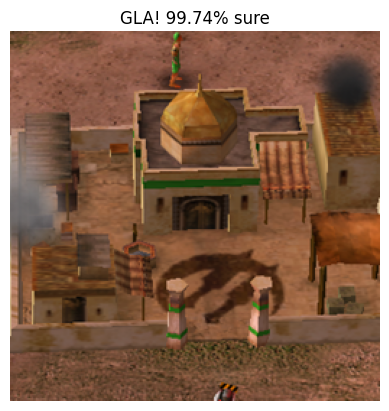

1/1 [==============================] - 0s 20ms/step


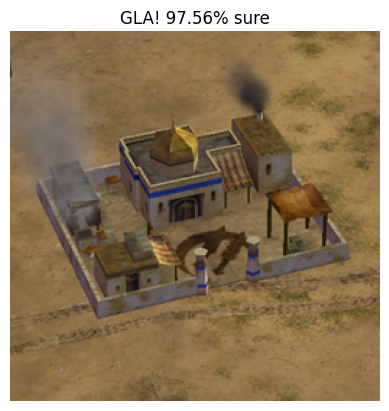

1/1 [==============================] - 0s 19ms/step


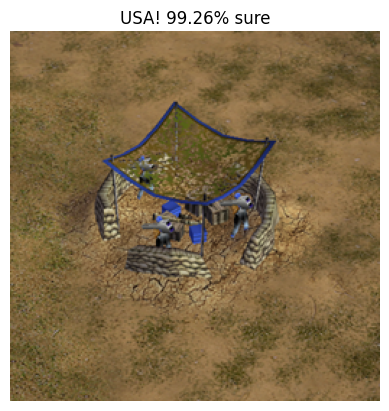

1/1 [==============================] - 0s 18ms/step


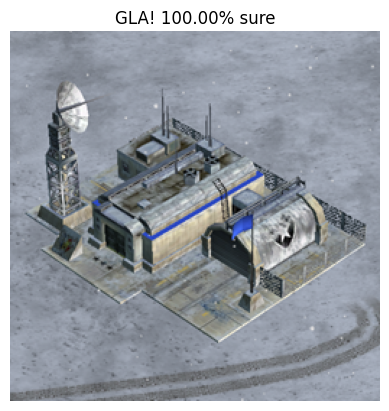

1/1 [==============================] - 0s 17ms/step


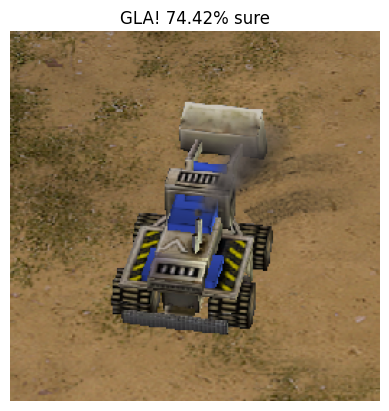

In [19]:
import os

for label in ['0', '1']:
    directory = os.path.join('GLA_USA/test', label)
    
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        
        # Load the image
        test_image = keras.utils.load_img(file_path)
        test_image_array = keras.preprocessing.image.img_to_array(test_image)
        test_image = tf.cast(test_image_array, dtype=tf.float32) / 255.0
        test_image = tf.expand_dims(test_image, axis=0)
        
        # Make prediction
        guess = model.predict(test_image)[0][0]
        prediction = 'GLA' if guess < 0.5 else 'USA'
        confidence = (1 - guess) * 100 if guess < 0.5 else guess * 100
        
        # Display the image with prediction
        plt.imshow(test_image_array.astype("uint8"))  # Display the image
        plt.title(f'{prediction}! {confidence:.2f}% sure')  # Title with prediction and confidence
        plt.axis('off')  # Hide axes
        plt.show()  # Show the image with title
